### Post Pruning
1. This technique is used after construction of the tree
2. This tech nique is used when DT will have very large depth and will show overfitting of the model
3. Also known as backward pruning
4. this technique is used when we have infinitly grown decision tree
5. Max_depth and Min_sample_split using cost complexity pruning

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_breast_cancer

In [10]:
X,y = load_breast_cancer(return_X_y=True)

In [3]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
type(X)

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(random_state = 0)
dtc1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
y_pred = dtc1.predict(X_test)

In [10]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [14, 76]], dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.8811188811188811

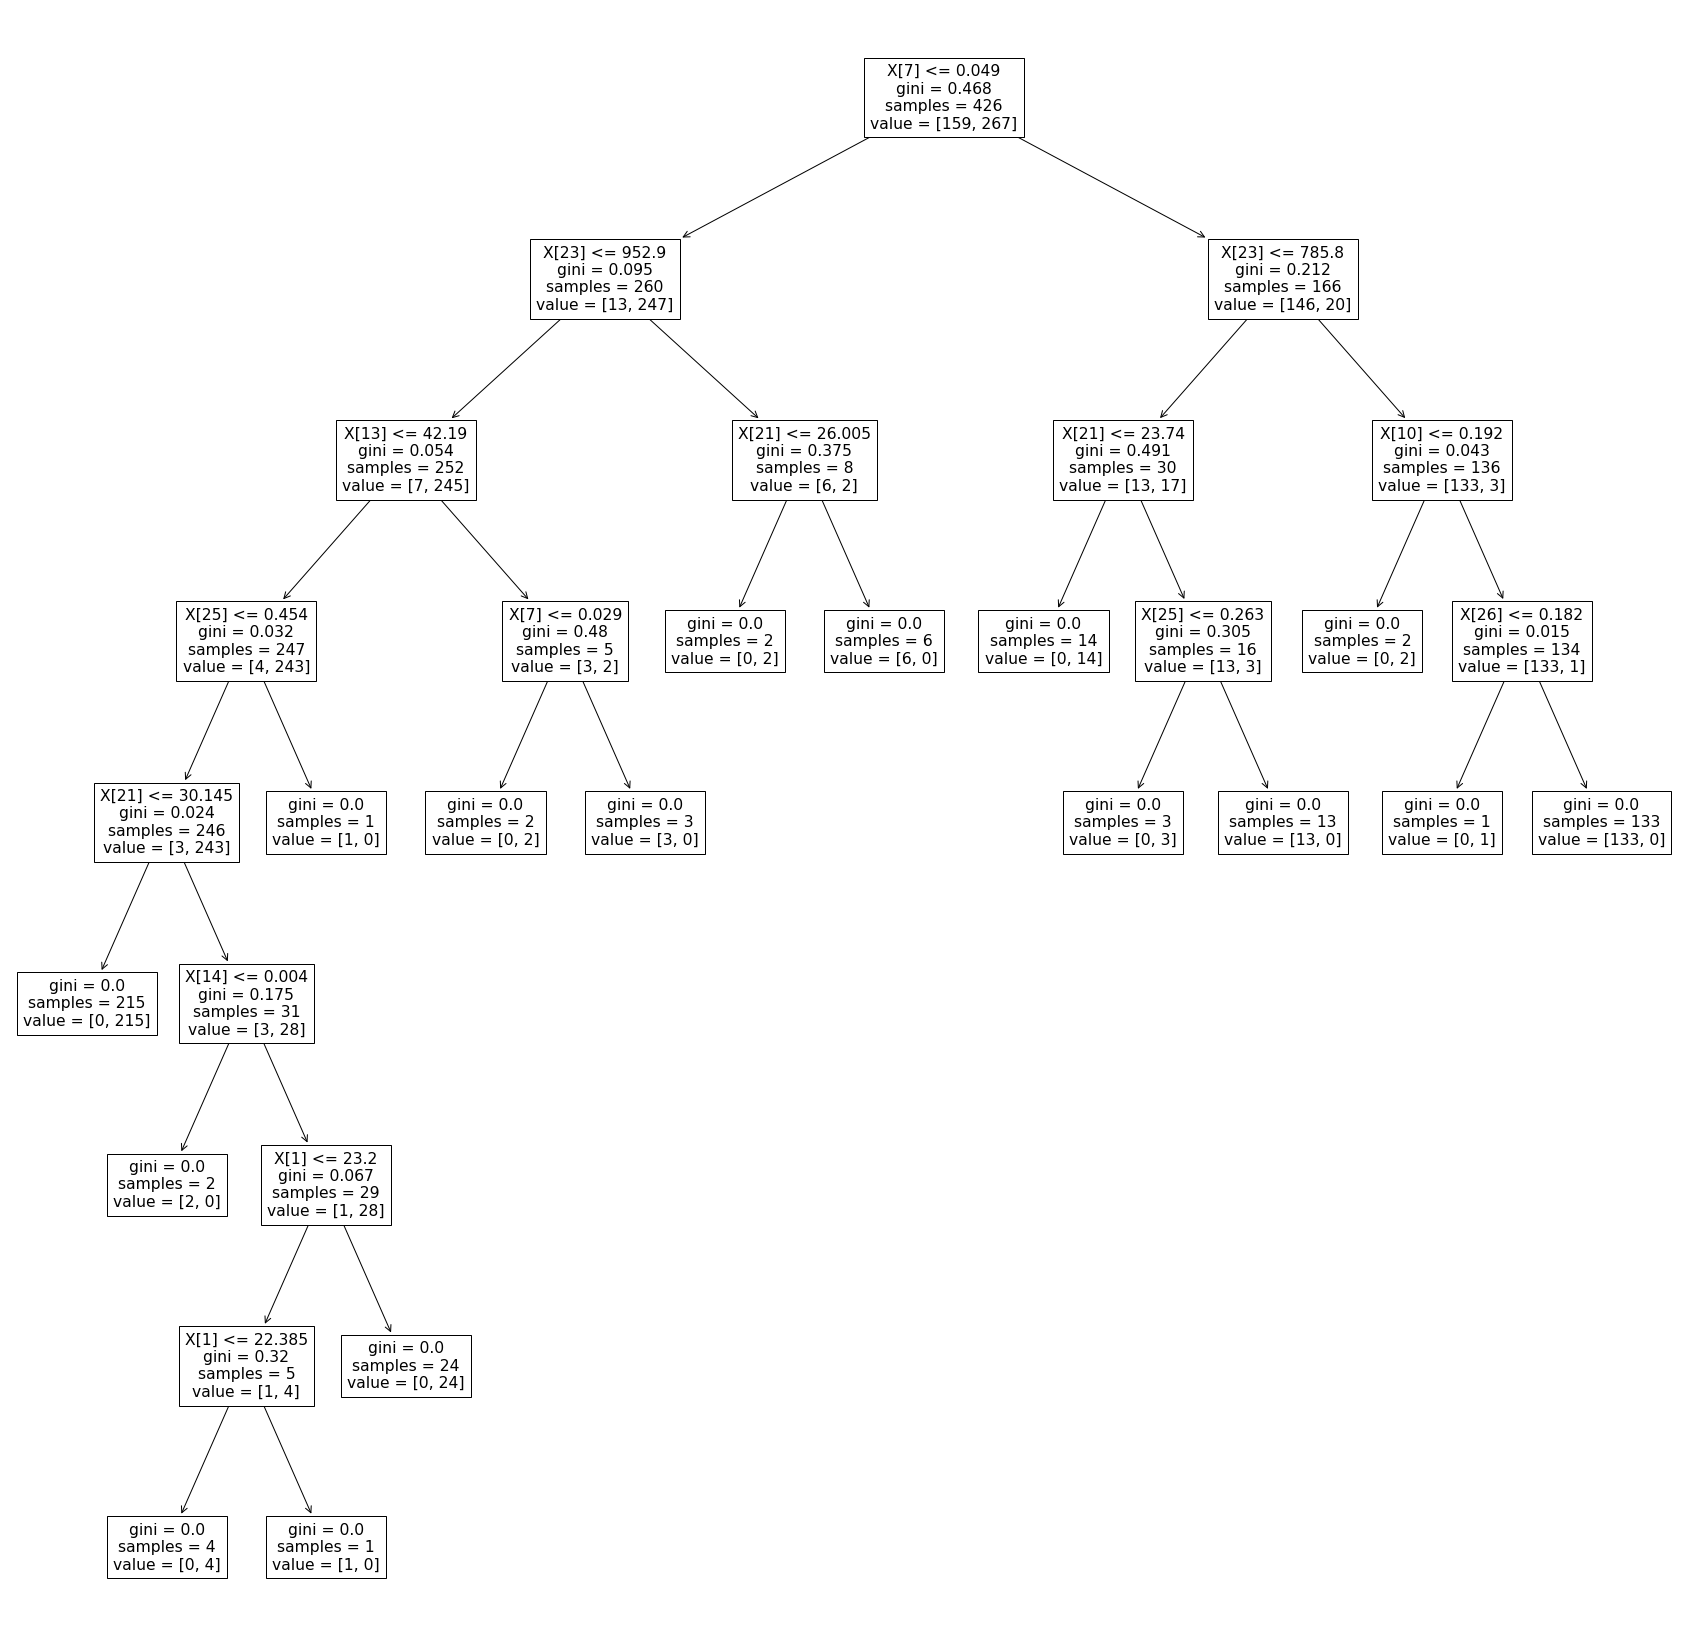

In [14]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc)
plt.show()

In [ ]:
# CCP Alpha - Cost Complexity Pruning alphas

In [16]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [17]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [18]:
impurities

array([0.        , 0.00453294, 0.01847522, 0.02313502, 0.02876883,
       0.03581108, 0.04365302, 0.05276704, 0.0642107 , 0.0831987 ,
       0.10634033, 0.14056508, 0.46786352])

In [20]:
clfs = []

for i in ccp_alphas:
        clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = i)
        clf.fit(X_train, y_train)
        clfs.append(clf)

In [21]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022664723976040134, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004647426339100881, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004659799593581376, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.005633802816901408, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007042253521126761, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.007841938420144537, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.009114019793328328, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.011443661971830986, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018988002086593604, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.023141627543035996, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03422474765119576, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3272984419327777, random_state=0)]

In [22]:
train_scores = [clf.score(X_train, y_train) for i in clfs]

In [24]:
test_scores = [clf.score(X_test, y_test) for i in clfs]

In [25]:
test_scores

[0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294,
 0.6293706293706294]

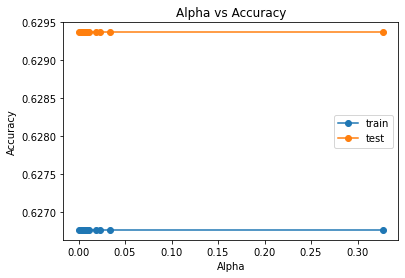

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Alpha vs Accuracy')
ax.plot(ccp_alphas, train_scores, marker = 'o',
label = 'train')
ax.plot(ccp_alphas, test_scores, marker = 'o',
label = 'test')
ax.legend()
plt.show()

In [30]:
dtc = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.02)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [31]:
y_pred = dtc.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[48,  5],
       [ 7, 83]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.916083916083916

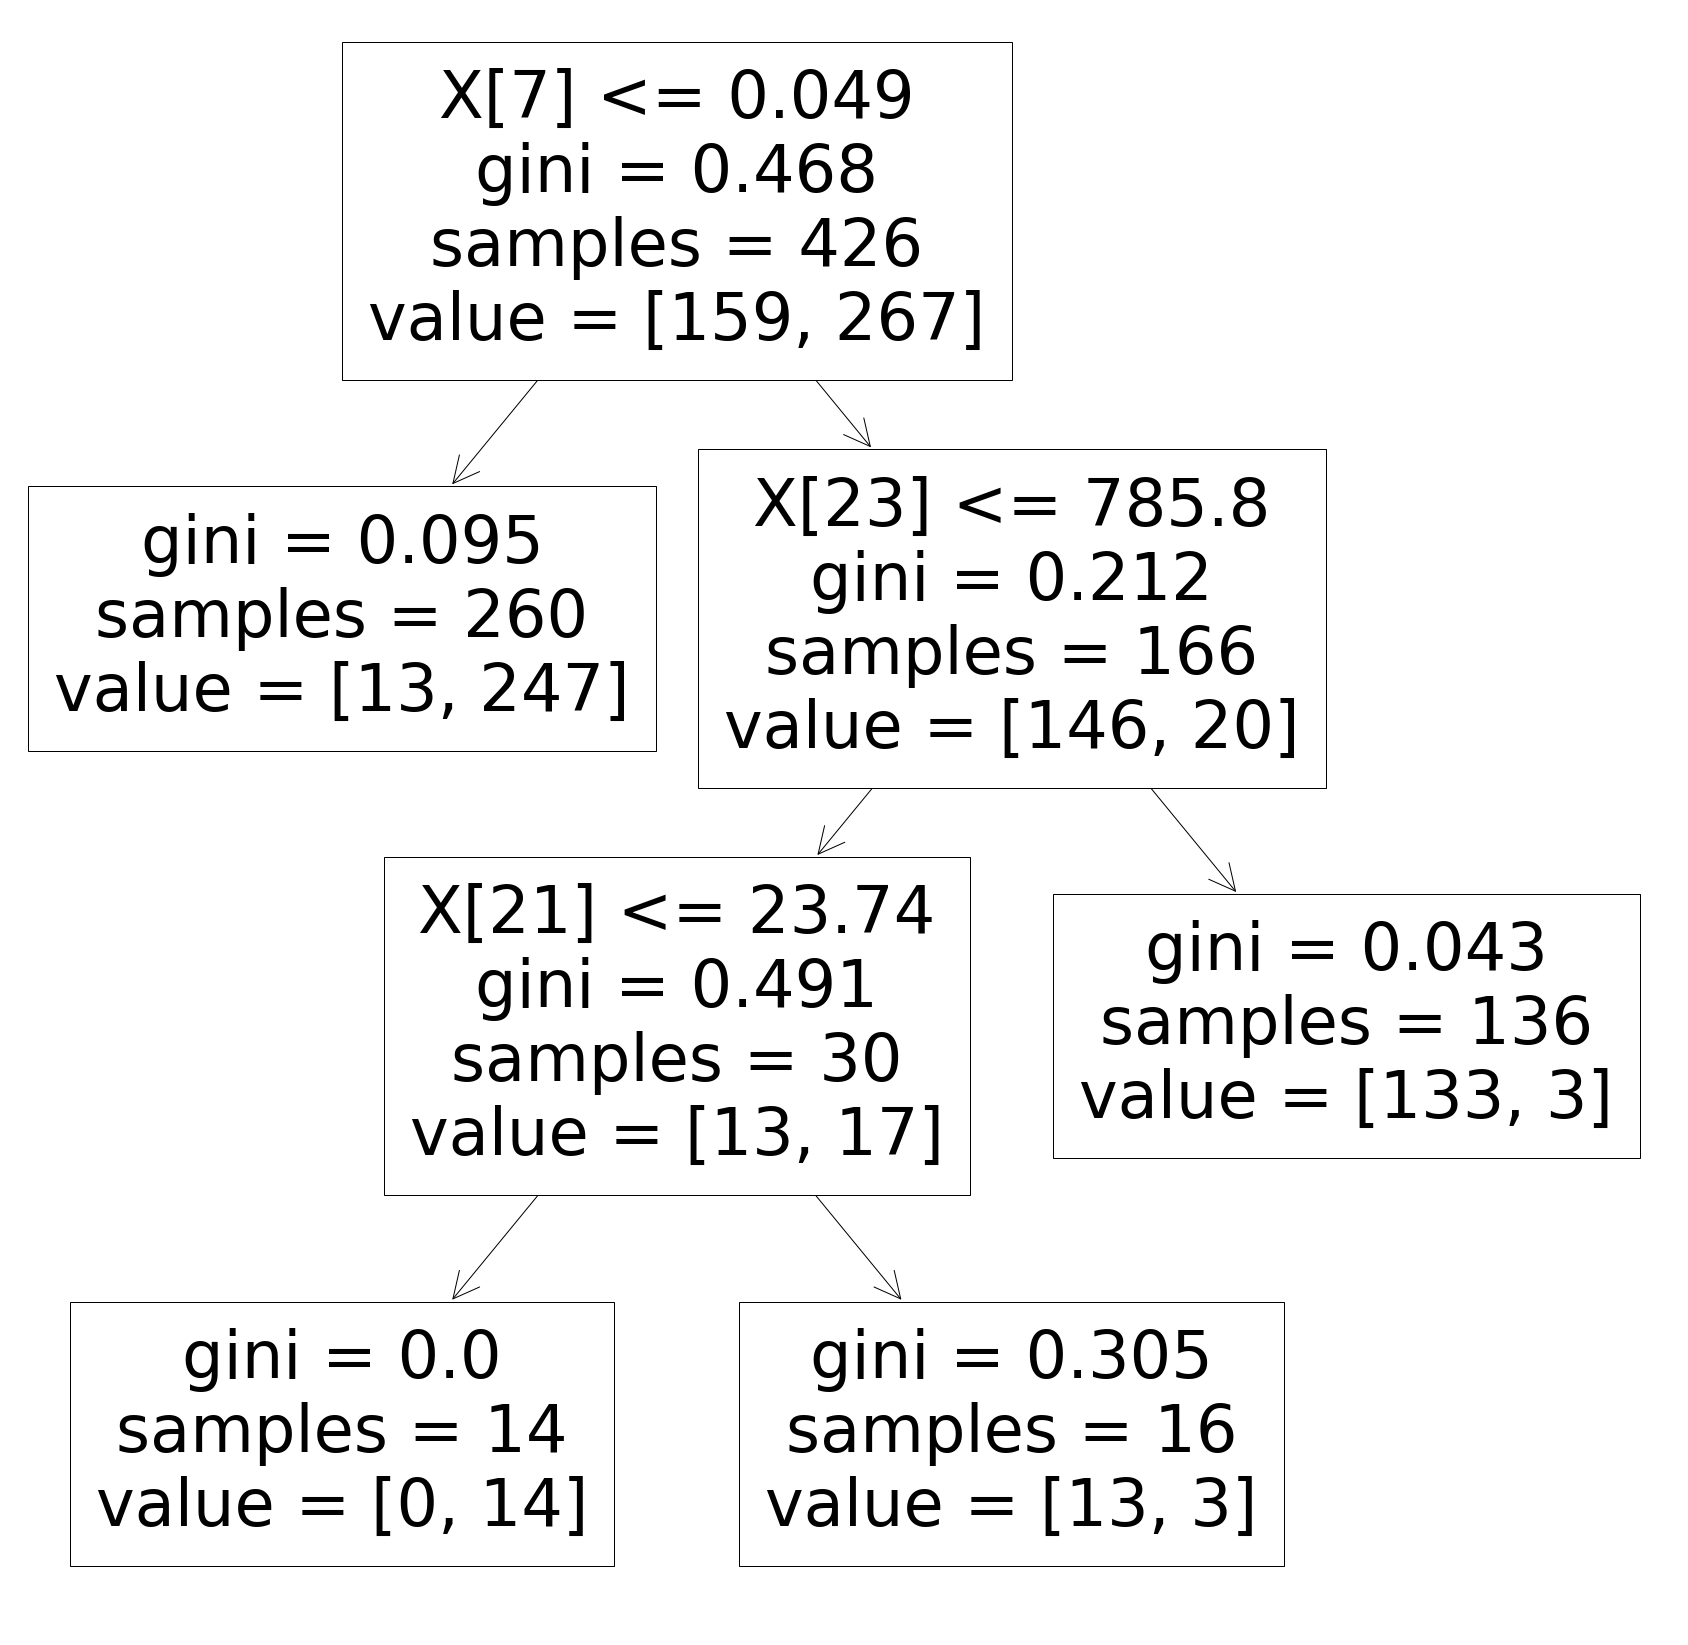

In [34]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc)
plt.show()

# Pre Pruning

### We use hyperparameter tuning in which we take a range of values for each parameters and whichever parametric value will be best, we will feed that parameter value to out DT model

In [6]:
grid = {'criterion' : ["gini", "entropy"],  
        'splitter': ['best', 'random'], 
        'max_depth':range(2,20,1), 
        'min_samples_split':range(2,10,1), 
        'min_samples_leaf':range(1,10,1)}

## Grid Search CV

In [7]:
grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': range(2, 20),
 'min_samples_split': range(2, 10),
 'min_samples_leaf': range(1, 10)}

In [8]:
from sklearn.model_selection import GridSearchCV

In [14]:
grid_search = GridSearchCV(estimator = dtc1, param_grid = grid, cv = 3)

In [15]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [16]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'splitter': 'random'}


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 2, min_samples_split = 6, splitter = 'random', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=6,
                       random_state=0, splitter='random')

In [18]:
y_pred = dtc.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
confusion_matrix(y_test, y_pred)

array([[51,  2],
       [ 4, 86]], dtype=int64)

In [21]:
accuracy_score(y_test, y_pred)

0.958041958041958

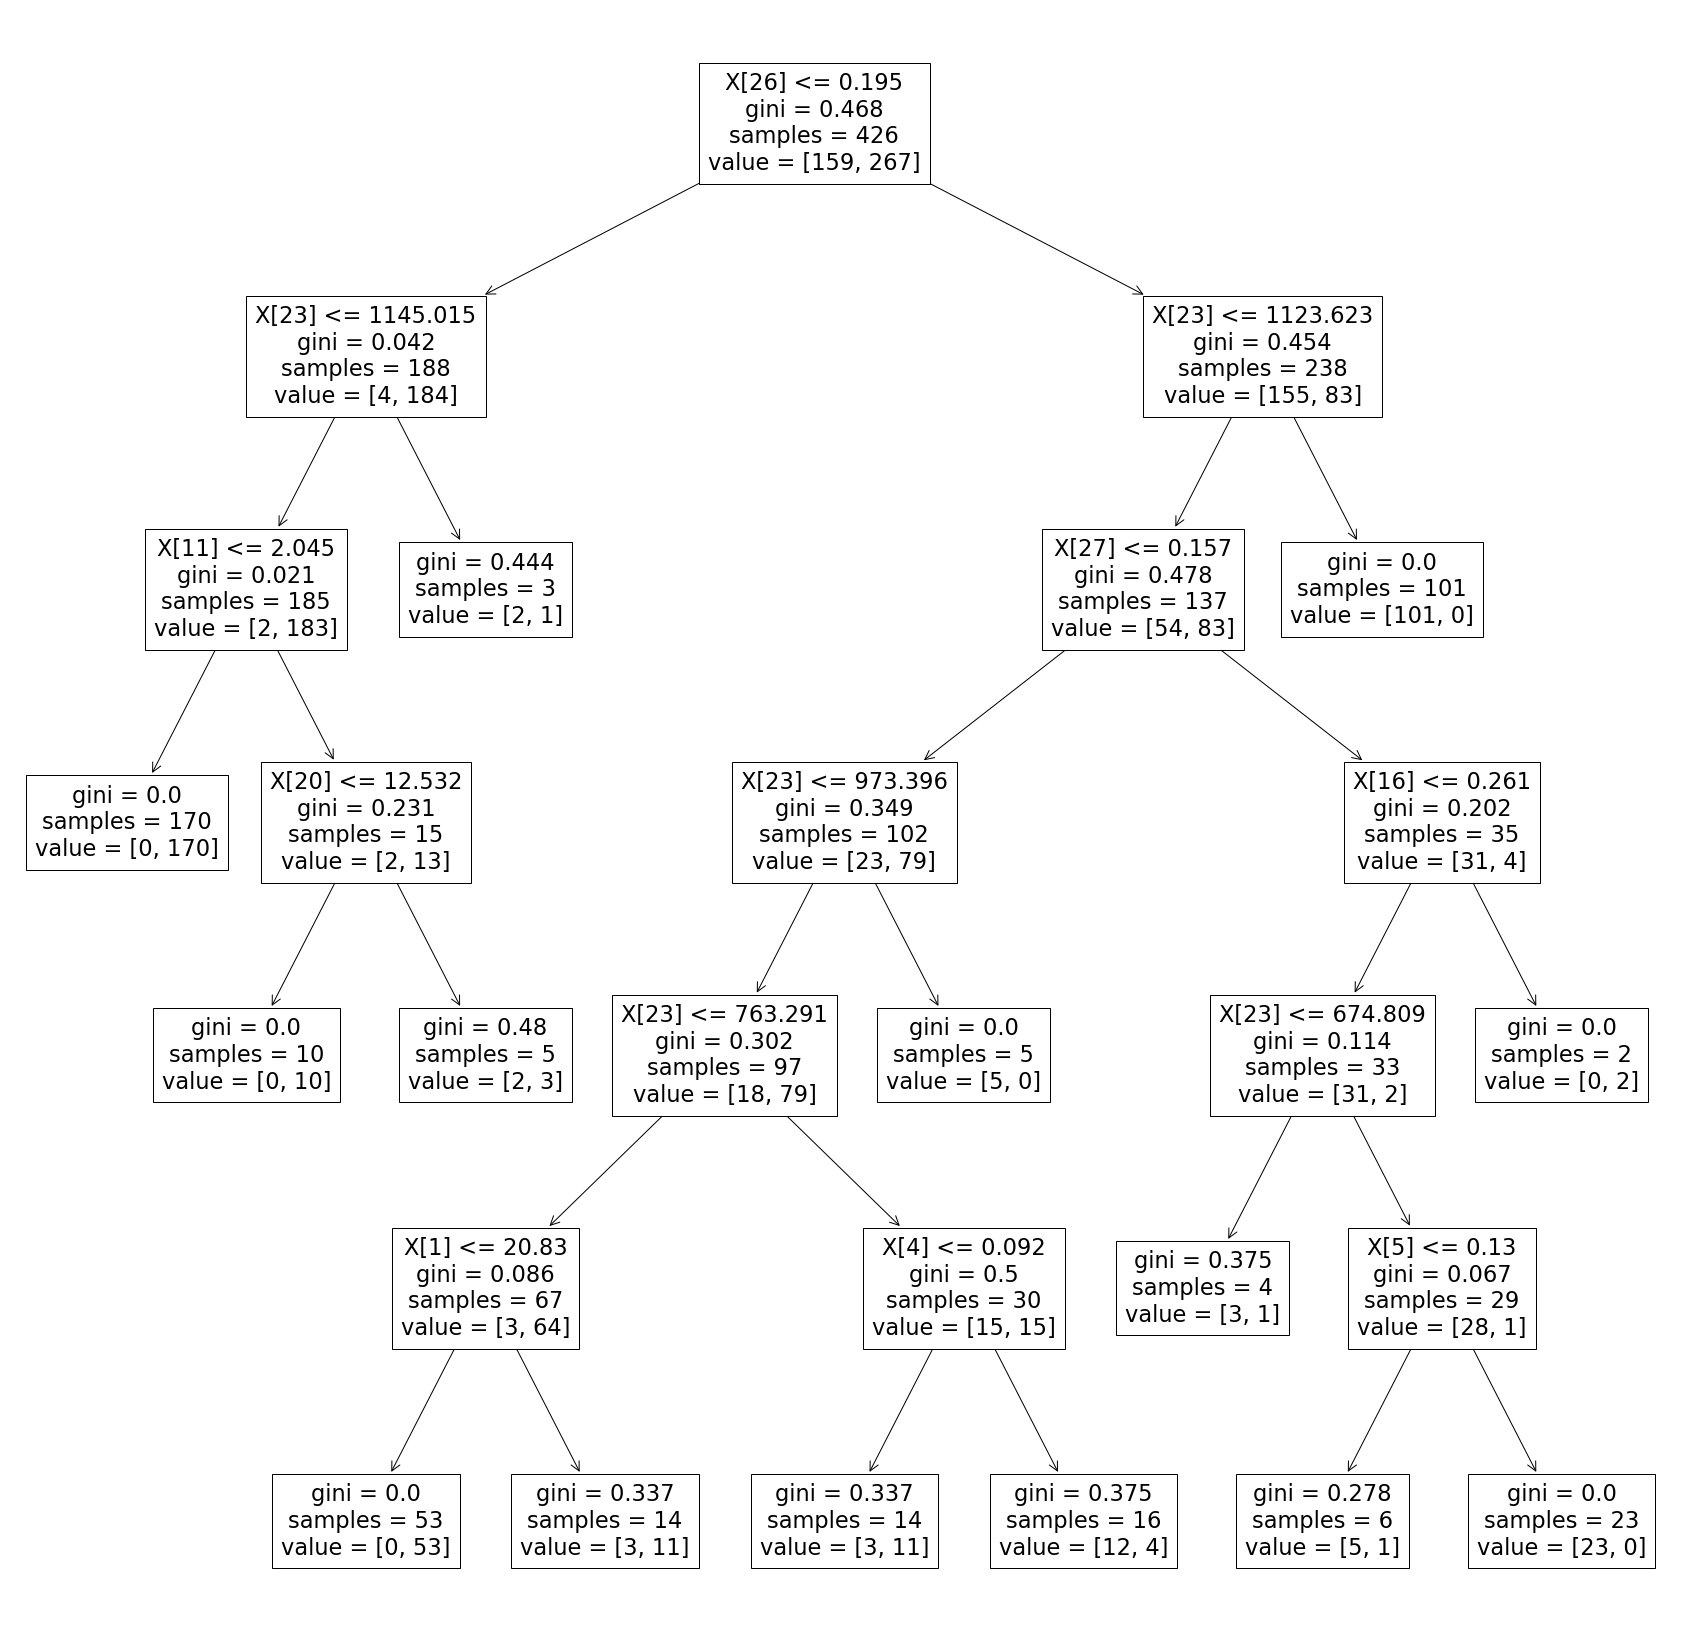

In [22]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc)
plt.show()